 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
read_whales = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
read_whales.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
read_whales.isna().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
read_whales.dropna()
# YOUR CODE HERE


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
read_algo = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
read_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
read_algo.isna().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
read_algo.dropna()
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes
# YOUR CODE HERE

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype('float')
# YOUR CODE HERE
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
# YOUR CODE HERE
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
clean_daily_returns = sp500_daily_returns.dropna()
# YOUR CODE HERE 
clean_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
clean_daily_returns.rename(columns={"Close": "Daily Returns"}, inplace = True)
# YOUR CODE HERE
clean_daily_returns.head()

C:\Users\ALEJANDRO\ANACONDA\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
all_returns_df = [clean_daily_returns, read_algo.dropna(), read_whales.dropna()]
# YOUR CODE HERE
concat_frames = pd.concat(all_returns_df, axis='columns', join='inner')
concat_frames.head()

,Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

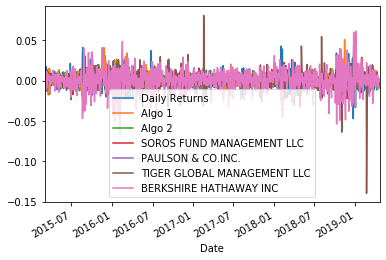

In [15]:
# Plot daily returns
daily_returns_plot = concat_frames.plot(legend=True)
# YOUR CODE HERE

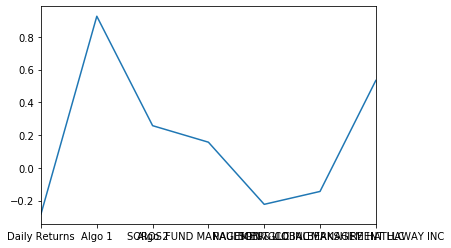

In [16]:
# Plot cumulative returns
cum_returns = ((concat_frames+1).cumprod()-1).iloc[-1]
# YOUR CODE HERE
cum_returns.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

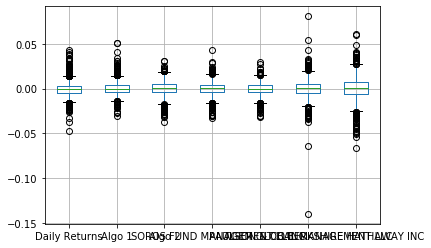

In [17]:
# Box plot to visually show risk
concat_frames.boxplot()
# YOUR CODE HERE

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?( Tiger, Berkshire are more risky than S&P)
Portfolio_Std = concat_frames.std()
# YOUR CODE HERE
Portfolio_Std


Daily Returns                  0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
"Tiger Global Management and Berkshire Hathaway are riskier portfolios than S&P500"

# YOUR CODE HERE

'Tiger Global Management and Berkshire Hathaway are riskier portfolios than S&P500'

In [20]:
# Calculate the annualized standard deviation (252 trading 
Annualized_Std = Portfolio_Std*np.sqrt(252)
# YOUR CODE HERE
Annualized_Std

Daily Returns                  0.136313
Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

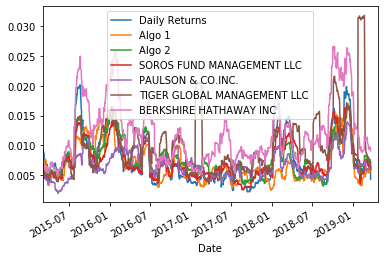

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
concat_frames.rolling(window=21).std().plot()
# YOUR CODE HERE

In [22]:
# Correlation
concat_corr = concat_frames.corr()
# YOUR CODE HERE
concat_corr

,Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Daily Returns,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
concat_var = concat_frames.var()
covar_Berk = concat_frames['BERKSHIRE HATHAWAY INC'].cov(concat_frames['Daily Returns'])
# YOUR CODE HERE
Berk_Beta = covar_Berk / concat_var
Berk_Beta

Daily Returns                 -0.020846
Algo 1                        -0.026454
Algo 2                        -0.022092
SOROS FUND MANAGEMENT LLC     -0.024653
PAULSON & CO.INC.             -0.031142
TIGER GLOBAL MANAGEMENT LLC   -0.012944
BERKSHIRE HATHAWAY INC        -0.009210
dtype: float64

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
Sharpe_ratios = (concat_frames.mean() * 252) / Annualized_Std
# YOUR CODE HERE
Sharpe_ratios

Daily Returns                 -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

 # plot() these sharpe ratios using a barplot.
 Sharpe
 # On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

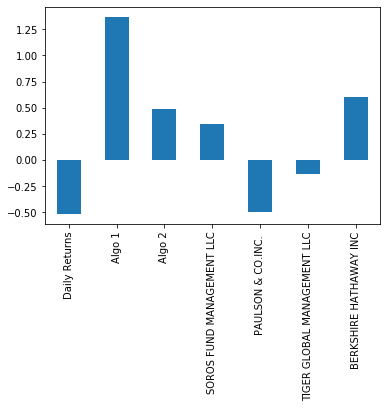

In [26]:
#  # plot() these sharpe ratios using a barplot.
Sharpe_ratios.plot.bar()
 # On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
AAPL_Data = Path("Resources/aapl_historical.csv")
AAPL_df = pd.read_csv(AAPL_Data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
AAPL_df.rename(columns={"NOCP": "AAPL NOCP"}, inplace = True)
Clean_AAPL = AAPL_df.drop(columns=['Symbol'])
# YOUR CODE HERE
Clean_AAPL.head()

,AAPL NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [29]:
# Read the second stock
GOOG_Data = Path("Resources/goog_historical.csv")
GOOG_df = pd.read_csv(GOOG_Data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
GOOG_df.rename(columns={"NOCP": "GOOG NOCP"}, inplace = True)
Clean_GOOG = GOOG_df.drop(columns=['Symbol'])
# YOUR CODE HERE
Clean_GOOG.head()

,GOOG NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [30]:
# Read the third stock
COST_Data = Path("Resources/cost_historical.csv")
COST_df = pd.read_csv(COST_Data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
COST_df.rename(columns={"NOCP": "COST NOCP"}, inplace = True)
Clean_COST = COST_df.drop(columns=['Symbol'])
# YOUR CODE HERE
Clean_COST.head()

,COST NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Concatenate all stocks into a single DataFrame
Stocks = [Clean_AAPL, Clean_COST, Clean_GOOG]
Stocks_df = pd.concat(Stocks, axis='columns', join='inner')
# YOUR CODE HERE
Stocks_df.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [32]:
# Reset the index
Stocks_df.sort_index(inplace=True)
# YOUR CODE HERE
Stocks_df.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [33]:
# Drop Nulls
Stocks_df.dropna()
# YOUR CODE HERE

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
Stock_Weights = Stocks_df.pct_change().dot(weights)
# YOUR CODE HERE
Stock_Weights.dropna()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# YOUR CODE HERE
conglomerate_df = [Stock_Weights.dropna(), concat_frames]
final_conglomerate_df = pd.concat(conglomerate_df, axis='columns', join='inner')
final_conglomerate_df.rename(columns={'Unnamed: 0':'My Portfolio Returns'}, inplace = True)
final_conglomerate_df.head()

,0,Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2018-05-14,0.000015,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000
2018-05-15,-0.010064,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.009403,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.001595,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140
2018-05-18,-0.006061,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
final_conglomerate_df.dropna()

,0,Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2018-05-14,0.000015,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000
2018-05-15,-0.010064,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.009403,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.001595,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140
2018-05-18,-0.006061,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212
...,...,...,...,...,...,...,...,...
2019-04-15,0.007522,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.000340,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,0.009292,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001545,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

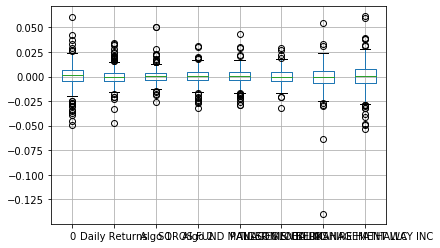

In [41]:
# Risk
# YOUR CODE HERE
final_conglomerate_df.boxplot()

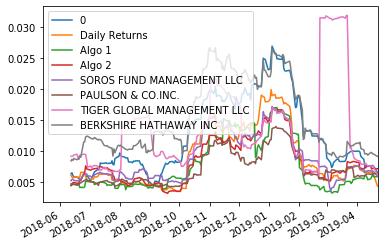

In [94]:
# Rolling
# YOUR CODE HERE
final_conglomerate_df.rolling(window=21).std().plot()

In [97]:
# Beta
# YOUR CODE HERE
variance = final_conglomerate_df.var()
covar = final_conglomerate_df[0].cov(final_conglomerate_df['Daily Returns'])
beta = covar / variance
beta

0                              0.004037
Daily Returns                  0.007778
Algo 1                         0.010080
Algo 2                         0.009291
SOROS FUND MANAGEMENT LLC      0.008389
PAULSON & CO.INC.              0.013224
TIGER GLOBAL MANAGEMENT LLC    0.003333
BERKSHIRE HATHAWAY INC         0.002956
dtype: float64

In [44]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
my_port_std = final_conglomerate_df.std()
Annual_Std = my_port_std*np.sqrt(252)
Annual_Sharpe_ratios = (final_conglomerate_df.mean() * 252) / Annual_Std
Annual_Sharpe_ratios

0                              0.876152
Daily Returns                 -0.427676
Algo 1                         2.001260
Algo 2                         0.007334
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
dtype: float64

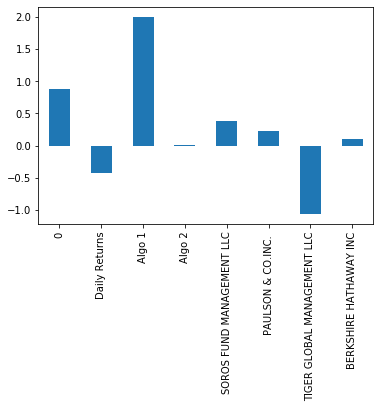

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
Annual_Sharpe_ratios.plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

In [46]:
# YOUR CODE HERE
final_conglomerate_df.corr()

,0,Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,1.000000,0.005603,0.260331,0.739020,0.732548,0.643828,0.390961,0.800558
Daily Returns,0.005603,1.000000,-0.054478,-0.042540,-0.028256,-0.059862,0.005881,-0.038832
Algo 1,0.260331,-0.054478,1.000000,0.364457,0.336909,0.360727,0.113671,0.325985
Algo 2,0.739020,-0.042540,0.364457,1.000000,0.862583,0.783865,0.408402,0.782054
SOROS FUND MANAGEMENT LLC,0.732548,-0.028256,0.336909,0.862583,1.000000,0.791802,0.477844,0.816197
PAULSON & CO.INC.,0.643828,-0.059862,0.360727,0.783865,0.791802,1.000000,0.484869,0.650390
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.005881,0.113671,0.408402,0.477844,0.484869,1.000000,0.324306
BERKSHIRE HATHAWAY INC,0.800558,-0.038832,0.325985,0.782054,0.816197,0.650390,0.324306,1.000000
